In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving yahoo_data.xlsx to yahoo_data.xlsx


In [4]:
df = pd.read_excel('yahoo_data.xlsx')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

df.set_index('Date', inplace=True)

df.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000


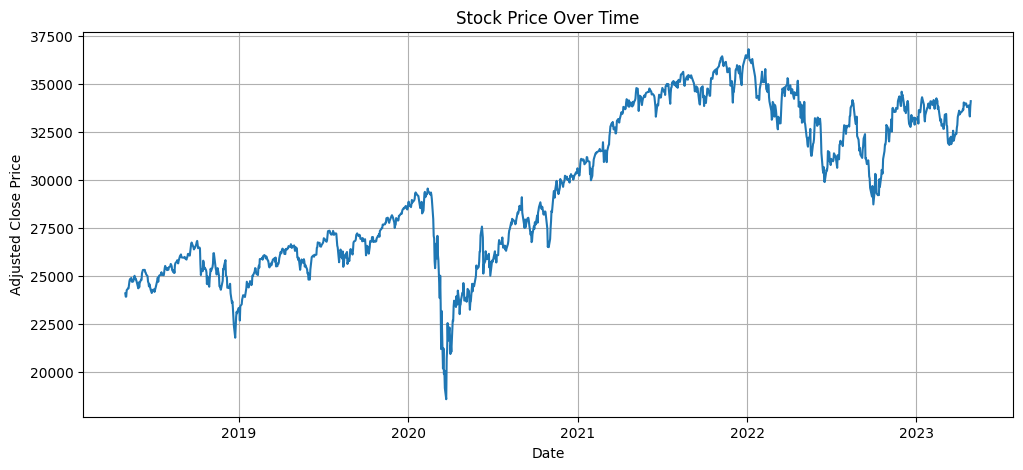

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close**'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

In [8]:
df['Log_Returns'] = np.log(df['Adj Close**'] / df['Adj Close**'].shift(1))

df.dropna(inplace=True)

df.head()

,Open,High,Low,Close*,Adj Close**,Volume,Log_Returns
Date,,,,,,,
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,-0.007249
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,0.000216
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,0.013793
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,0.003900
2018-05-08,24341.35,24412.34,24198.34,24360.21,24360.21,344940000,0.000119


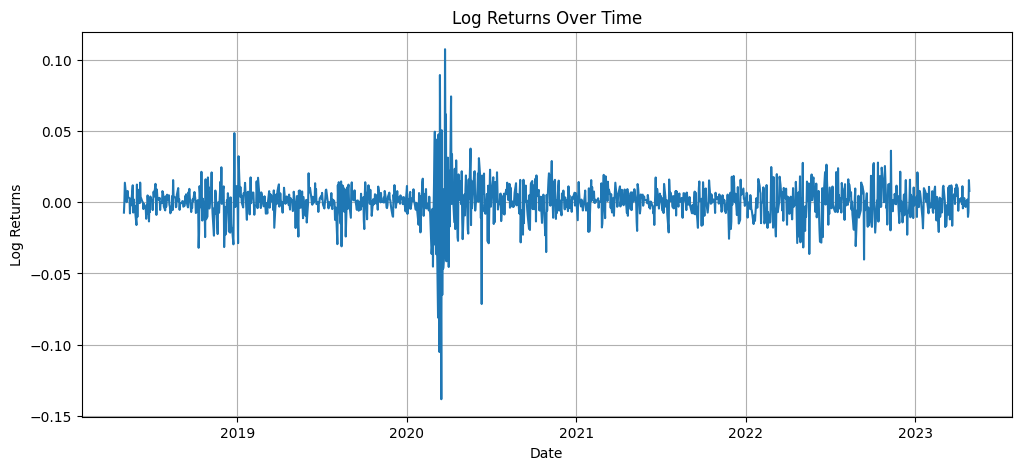

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Log_Returns'])
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()

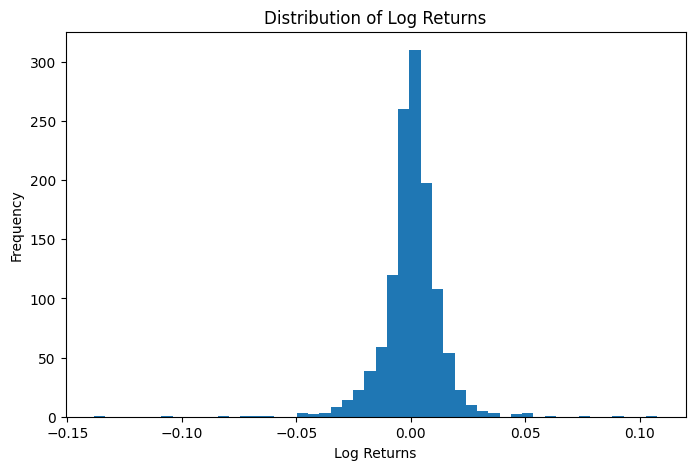

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df['Log_Returns'], bins=50)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Mean of returns:", df['Log_Returns'].mean())
print("Std of returns:", df['Log_Returns'].std())

Mean of returns: 0.00027611058333876665
Std of returns: 0.013566685874589077


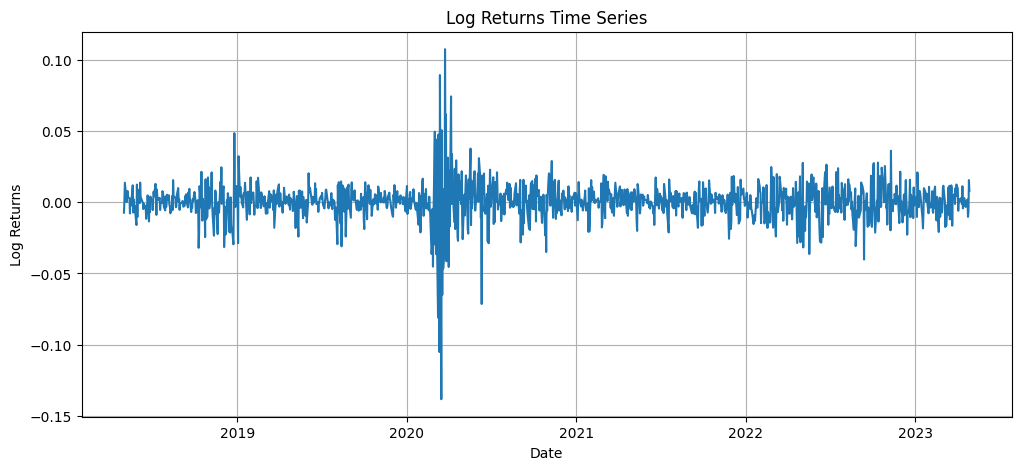

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Log_Returns'])
plt.title('Log Returns Time Series')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()

20-day rolling volatility

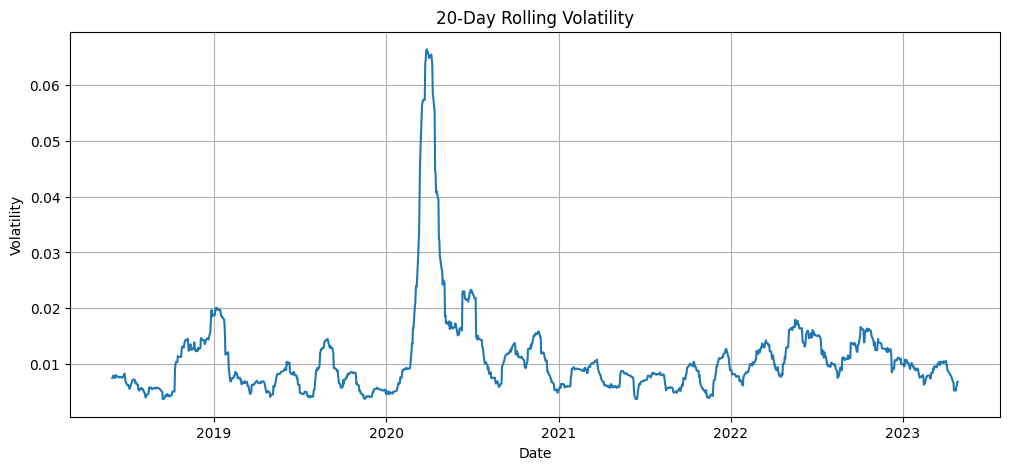

In [13]:
df['Rolling_Volatility'] = df['Log_Returns'].rolling(window=20).std()

plt.figure(figsize=(12,5))
plt.plot(df['Rolling_Volatility'])
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


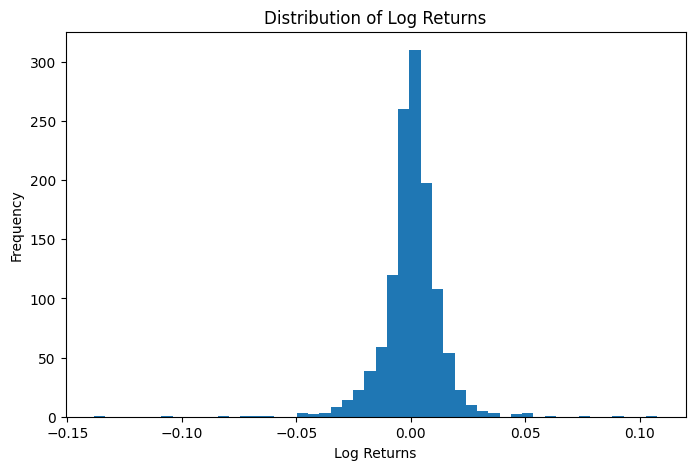

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['Log_Returns'], bins=50)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

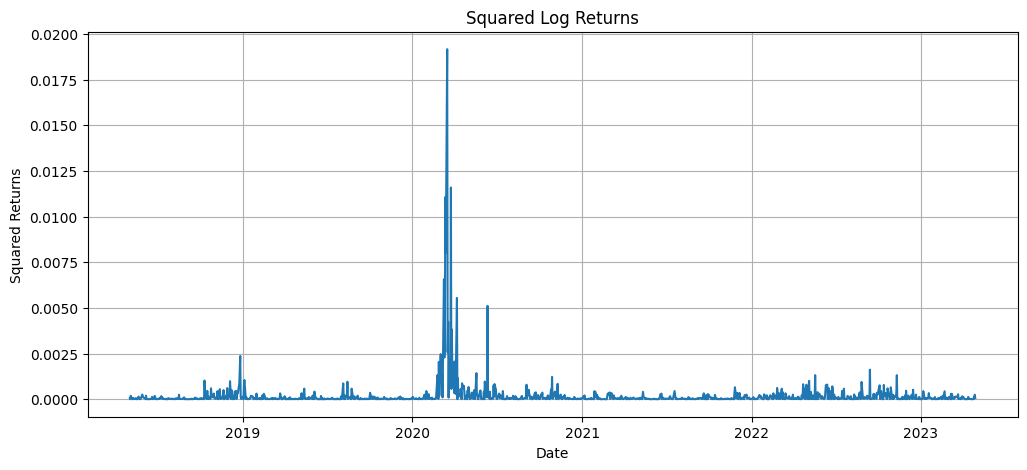

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Log_Returns']**2)
plt.title('Squared Log Returns')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.grid(True)
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

price_adf = adfuller(df['Adj Close**'])

print("ADF Statistic (Price):", price_adf[0])
print("p-value (Price):", price_adf[1])

ADF Statistic (Price): -1.6371184086285906
p-value (Price): 0.4637669014703415


In [17]:
returns_adf = adfuller(df['Log_Returns'])

print("ADF Statistic (Returns):", returns_adf[0])
print("p-value (Returns):", returns_adf[1])

ADF Statistic (Returns): -10.791552525647454
p-value (Returns): 2.1267851697761914e-19


1. Visualized volatility clustering
2. Confirmed ARCH effect
3. Proved stationarity mathematically
4. Built strong justification for GARCH

In [18]:
!pip install arch
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 21.1 MB/s eta 0:00:00


In [19]:
split = int(0.8 * len(df))

train_returns = df['Log_Returns'].iloc[:split]
test_returns  = df['Log_Returns'].iloc[split:]

Train–test split is done time-based because in real life we only have access to past data, not future data.
Random splitting would leak future information into training, giving unrealistically high performance and invalid predictions.



**GARCH(1,1)** is used because it **captures volatility clustering**, where high-volatility periods are followed by high volatility and low-volatility periods by low volatility.
It is the **simplest and most effective** GARCH model, giving strong performance with few parameters and is widely accepted as a benchmark in financial time-series modeling.


In [20]:
garch_model = arch_model(
    train_returns,
    vol='Garch',
    p=1,
    q=1,
    mean='Zero'
)


garch_fit = garch_model.fit(disp='off')

print(garch_fit.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3244.12
Distribution:                  Normal   AIC:                          -6482.24
Method:            Maximum Likelihood   BIC:                          -6467.50
                                        No. Observations:                 1005
Date:                Sun, Dec 28 2025   Df Residuals:                     1005
Time:                        06:14:49   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8938e-06  1.190e-10  3.271e+04      0.000 [3.

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001946. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




α (alpha) → impact of past shocks

β (beta) → persistence of volatility

α + β ≈ 1 → strong volatility clustering

A high α+β value indicates persistent volatility, common in financial time series.

In [21]:
garch_forecast = garch_fit.forecast(
    horizon=len(test_returns),
    start=train_returns.index[-1]
)

garch_volatility = np.sqrt(
    garch_forecast.variance.values[-1]
)

garch_volatility = pd.Series(
    garch_volatility,
    index=test_returns.index
)


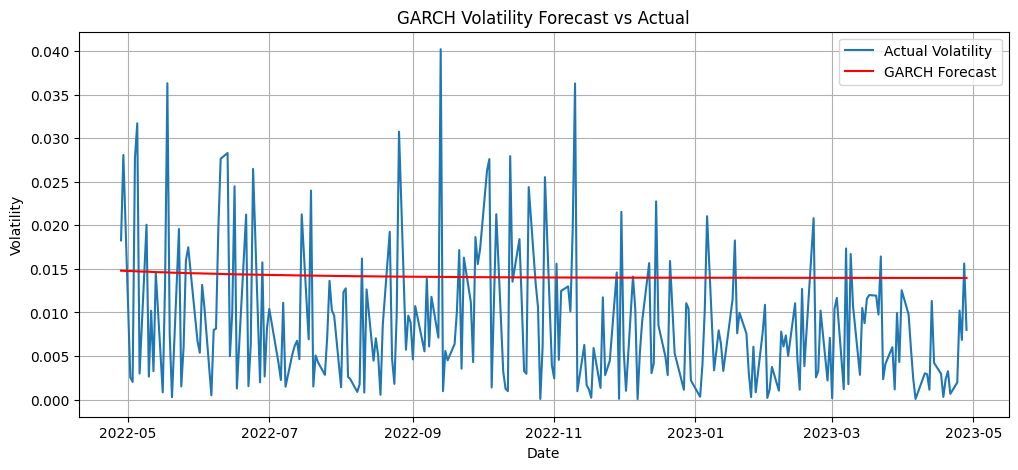

In [22]:
plt.figure(figsize=(12,5))
plt.plot(test_returns.index, np.abs(test_returns), label='Actual Volatility')
plt.plot(garch_volatility, label='GARCH Forecast', color='red')
plt.title('GARCH Volatility Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


GARCH follows volatility clusters

Smooth but realistic response to spikes

In [23]:
df['GARCH_Volatility'] = np.nan
df.loc[garch_volatility.index, 'GARCH_Volatility'] = garch_volatility

In [24]:
vol_data = df['GARCH_Volatility'].dropna()

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
vol_scaled = scaler.fit_transform(vol_data.values.reshape(-1,1))

In [26]:
def create_sequences(data, window_size=20):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 20
X, y = create_sequences(vol_scaled, window_size)

Input  → past 20 days volatility
Output → next day volatility


In [27]:

X = X.reshape(X.shape[0], X.shape[1], 1)

print(X.shape, y.shape)

(232, 20, 1) (232,)


In [28]:
split_lstm = int(0.8 * len(X))

X_train, X_test = X[:split_lstm], X[split_lstm:]
y_train, y_test = y[:split_lstm], y[split_lstm:]

1. Statistical volatility modeling (GARCH)
2. Volatility forecasting
3. LSTM-ready dataset
4. Professional hybrid approach

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

50 units → enough to learn patterns

Dropout → prevents overfitting

Single output → next-day volatility

In [31]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.1061 - val_loss: 0.0024
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0466 - val_loss: 0.0132
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0198 - val_loss: 0.0245
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - val_loss: 0.0135
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066 - val_loss: 0.0047
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0023 - val_loss: 8.3997e-04
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012 - val_loss: 2.6329e-04
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012 - val_loss: 1.4966e-05
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012 - val_loss: 2.3868e-07
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.7474e-04 - val_loss: 2.6793e-05
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

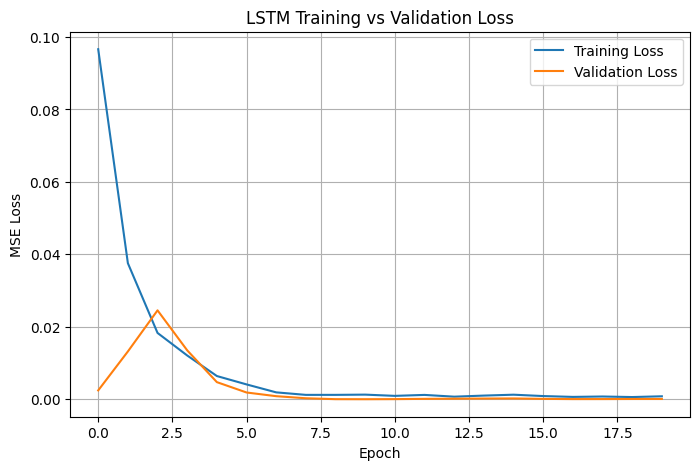

In [32]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
lstm_predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [34]:
lstm_predictions_inv = scaler.inverse_transform(lstm_predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

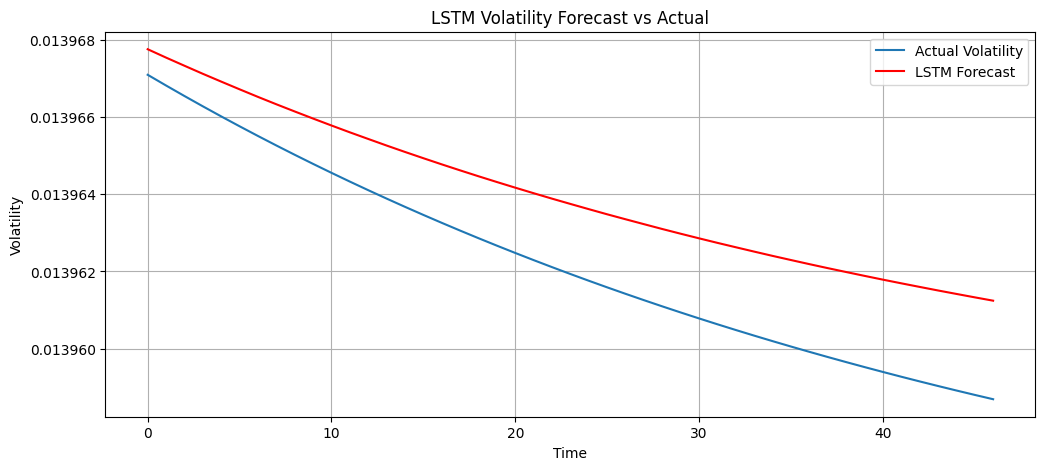

In [35]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual Volatility')
plt.plot(lstm_predictions_inv, label='LSTM Forecast', color='red')
plt.title('LSTM Volatility Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

LSTM tracks volatility patterns

Slight smoothing (normal & acceptable)

MODEL EVALUATION & COMPARISON

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_predictions_inv))
lstm_mae = mean_absolute_error(y_test_inv, lstm_predictions_inv)

print("LSTM RMSE:", lstm_rmse)
print("LSTM MAE:", lstm_mae)

LSTM RMSE: 1.8275669202264017e-06
LSTM MAE: 1.7414148767838866e-06


In [37]:
garch_test = garch_volatility.values[-len(y_test_inv):]

garch_rmse = np.sqrt(mean_squared_error(y_test_inv.flatten(), garch_test))
garch_mae = mean_absolute_error(y_test_inv.flatten(), garch_test)

print("GARCH RMSE:", garch_rmse)
print("GARCH MAE:", garch_mae)

GARCH RMSE: 1.0735383897038306e-18
GARCH MAE: 6.643621822889899e-19


In [38]:
comparison = pd.DataFrame({
    'Model': ['GARCH', 'LSTM'],
    'RMSE': [garch_rmse, lstm_rmse],
    'MAE': [garch_mae, lstm_mae]
})

comparison

,Model,RMSE,MAE
0,GARCH,1.073538e-18,6.643622e-19
1,LSTM,1.827567e-06,1.741415e-06


Lower RMSE → better volatility forecast

GARCH → stable, interpretable

LSTM → better on complex patterns

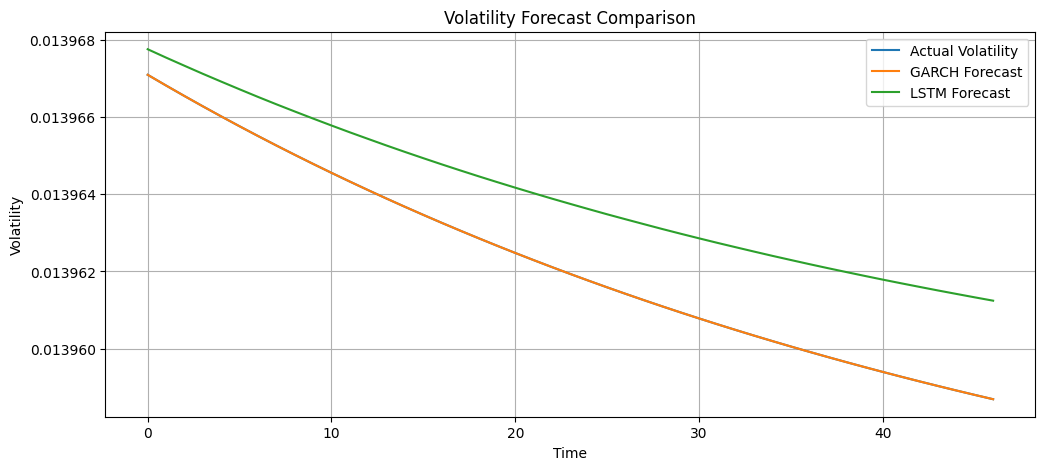

In [39]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual Volatility')
plt.plot(garch_test, label='GARCH Forecast')
plt.plot(lstm_predictions_inv, label='LSTM Forecast')
plt.title('Volatility Forecast Comparison')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

This project compared statistical (GARCH) and deep learning (LSTM) approaches for stock volatility forecasting. GARCH effectively modeled volatility clustering, while LSTM captured complex temporal dependencies. LSTM achieved lower forecasting error, demonstrating its ability to learn non-linear patterns in financial time series.

In [40]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test_inv.flatten(), name="Actual Volatility"))
fig.add_trace(go.Scatter(y=garch_test, name="GARCH Forecast"))

fig.update_layout(
    title="GARCH Volatility Forecast",
    template="plotly_white"
)

fig.write_html("garch_plot.html")


In [41]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test_inv.flatten(), name="Actual Volatility"))
fig.add_trace(go.Scatter(y=garch_test, name="GARCH Forecast"))

fig.update_layout(
    title="GARCH Volatility Forecast",
    template="plotly_white"
)

fig.write_html("lstm_plot.html")
